In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import string
import plotly.express as px


import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report,precision_score,accuracy_score,make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SHADO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SHADO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHADO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SHADO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
df=pd.read_csv("./data/McDonald_s_Reviews.csv", encoding='latin-1')


In [6]:
df.sample(4)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
6337,6338,McDonald's,Fast food restaurant,"490 8th Ave, New York, NY 10001, United States",40.752529,-73.992876,"3,902",6 years ago,Why read a review of a McDonalds? Because they...,1 star
30376,30377,McDonald's,Fast food restaurant,"9814 International Dr, Orlando, FL 32819, Unit...",28.423814,-81.461242,"5,468",11 months ago,Everyone knows what to eat at Mc Donald's. The...,5 stars
11002,11003,McDonald's,Fast food restaurant,"1650 Washington Ave, Miami Beach, FL 33139, Un...",25.790295,-80.132077,"4,922",4 years ago,Slow service. At night time absolutly slow and...,1 star
28055,28056,McDonald's,Fast food restaurant,"5725 W Irlo Bronson Memorial Hwy, Kissimmee, F...",28.333508,-81.513738,"5,567",3 years ago,I went through the drive-thru at this location...,1 star


In [7]:
df.isna().sum()

reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review             0
rating             0
dtype: int64

In [8]:
def null_count():
   return pd.DataFrame({
        # "Columns":df.columns,
        "dtypes":df.dtypes,
        "Null Values":df.isnull().sum().values,
        "Null Prercentage":df.isnull().sum().values/df.shape[0]
    }).style.background_gradient(cmap='turbo',low=0.0,high=0.01)

In [9]:
null_count()

,dtypes,Null Values,Null Prercentage
reviewer_id,int64,0,0.000000
store_name,object,0,0.000000
category,object,0,0.000000
store_address,object,0,0.000000
latitude,float64,660,0.019763
longitude,float64,660,0.019763
rating_count,object,0,0.000000
review_time,object,0,0.000000
review,object,0,0.000000
rating,object,0,0.000000


In [10]:
df.duplicated().sum()


0

In [11]:
df.columns

Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude ',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')

In [12]:
for col in df.columns:
    num_distinct_values=len(df[col].unique())
    print(f"{col}: {num_distinct_values} unique values")

reviewer_id: 33396 unique values
store_name: 2 unique values
category: 1 unique values
store_address: 40 unique values
latitude : 40 unique values
longitude: 40 unique values
rating_count: 51 unique values
review_time: 39 unique values
review: 22285 unique values
rating: 5 unique values


In [13]:
df[df.isnull().any(axis = 1)]

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
22141,22142,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",3 months ago,Breakfast specials are good. The sausage burri...,4 stars
22142,22143,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",a year ago,This isn't your typical McDonald's. This place...,5 stars
22143,22144,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",2 weeks ago,This place was serving good quality breakfast ...,4 stars
22144,22145,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",a month ago,I understand this is a very busy location but ...,1 star
22145,22146,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",2 months ago,"When I arrived at McDonald's, it was very crow...",4 stars
...,...,...,...,...,...,...,...,...,...,...
27719,27720,ýýýMcDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",3 years ago,This McDonald's is across the street from Waik...,5 stars
27720,27721,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",11 months ago,"Seems like, they always makes some mistakes wh...",2 stars
27721,27722,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",11 months ago,Convenient to the east end of Kalakaua Ave. Lo...,4 stars
27722,27723,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",11 months ago,"Lost McDonald's in Honolulu, if you can avoid ...",1 star


In [14]:
df=df.dropna()

In [15]:
df.shape

(32736, 10)

In [16]:
df1=df.copy()

In [17]:
df1.columns.values

array(['reviewer_id', 'store_name', 'category', 'store_address',
       'latitude ', 'longitude', 'rating_count', 'review_time', 'review',
       'rating'], dtype=object)

In [18]:
df1.sample(1)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
15448,15449,McDonald's,Fast food restaurant,"8500 US-290, Austin, TX 78724, United States",30.329135,-97.660629,"1,406",a month ago,One of the better ones around with nice employees,5 stars


In [19]:
df1=df1.drop(columns=["reviewer_id","store_name","category","longitude","rating_count"],axis=1)

In [20]:
df1.sample(1)

,store_address,latitude,review_time,review,rating
23174,"5725 W Irlo Bronson Memorial Hwy, Kissimmee, F...",28.333508,2 years ago,I always go out of my way to go to this McDona...,5 stars


In [21]:
df1.columns = df1.columns.str.strip()


In [22]:
df1.drop(columns=["latitude"],inplace=True)

In [23]:
df1.sample(3)

,store_address,review_time,review,rating
2313,"72-69 Kissena Blvd, Queens, NY 11367, United S...",2 years ago,The manager is always stressed and doesnt know...,2 stars
28700,"1415 E State Rd, Fern Park, FL 32730, United S...",3 months ago,Maitland avenue bad customer service to the dr...,1 star
17458,"702-2 Haddonfield-Berlin Rd, Voorhees Township...",a year ago,"Not great, not terrible, but alright - way too...",3 stars


In [24]:
df1[['store_address']].sample(5)


,store_address
23594,"1415 E State Rd, Fern Park, FL 32730, United S..."
10160,"690 Alameda St, Los Angeles, CA 90021, United ..."
28125,"5725 W Irlo Bronson Memorial Hwy, Kissimmee, F..."
29446,"1415 E State Rd, Fern Park, FL 32730, United S..."
6374,"490 8th Ave, New York, NY 10001, United States"


In [25]:
df1[["city","state"]]=df1["store_address"].apply(lambda x:pd.Series(x.split(",")[-3:-1]))

In [26]:
df1.sample(3)

,store_address,review_time,review,rating,city,state
13388,"1540 2nd St, Santa Monica, CA 90405, United St...",2 years ago,We love it.ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½,4 stars,Santa Monica,CA 90405
17180,"10901 Riverside Dr, North Hollywood, CA 91602,...",2 years ago,Poor,2 stars,North Hollywood,CA 91602
16741,"10901 Riverside Dr, North Hollywood, CA 91602,...",4 years ago,Great place! Restrooms are clean!,4 stars,North Hollywood,CA 91602


In [27]:
df1.drop(columns=["store_address"],axis=1,inplace=True)

In [28]:
df1.sample(7)

,review_time,review,rating,city,state
26099,5 years ago,The time you have to wait for your food is dis...,1 star,Miami,FL 33137
7437,4 years ago,Great customer service.,4 stars,Sunnyvale,CA 94086
21876,4 years ago,Clean. Fast.,5 stars,Las Vegas,NV 89119
12690,5 years ago,Sits on a street known for heavy prostitution....,3 stars,Los Angeles,CA 90044
3757,4 months ago,Excellent,5 stars,New York,NY 10001
2660,a year ago,Good,4 stars,Queens,NY 11367
20302,2 years ago,I know McDonald's isn't known for customer ser...,1 star,Fort Worth,TX 76177


In [29]:
df1[["rating"]].sample(9)

,rating
11490,3 stars
25247,5 stars
32416,5 stars
29829,1 star
195,3 stars
31206,4 stars
26045,1 star
25418,5 stars
18678,4 stars


In [30]:
df1["Rating"]=df["rating"].apply(lambda x:x.split()[0])

In [31]:
df1.sample(3)

,review_time,review,rating,city,state,Rating
25878,9 months ago,This is by far THE worst McDonalds I have ever...,1 star,Miami,FL 33137,1
11088,2 years ago,I overheard the man standing at the window out...,1 star,Miami Beach,FL 33139,1
10228,10 months ago,Is my favorite restaurant ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,5 stars,Los Angeles,CA 90021,5


In [32]:
df1.drop(columns=["rating"],inplace=True)

In [33]:
df1.sample(3)

,review_time,review,city,state,Rating
20533,3 years ago,Staff was rude all food was cold horrible plac...,Fort Worth,TX 76177,1
5175,3 years ago,Neutral,New York,NY 10003,3
10218,10 months ago,Fool's not hot enough expensive when you ask h...,Los Angeles,CA 90021,1


In [34]:
unique_review=df1["review"].unique()

In [35]:
unique_review

array(['Why does it look like someone spit on my food?\nI had a normal transaction,  everyone was chill and polite, but now i dont want to eat this. Im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back.',
       "It'd McDonalds. It is what it is as far as the food and atmosphere go. The staff here does make a difference. They are all friendly, accommodating and always smiling. Makes for a more pleasant experience than many other fast food places.",
       'Made a mobile order got to the speaker and checked it in.\nLine was not moving so I had to leave otherwise Iï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½d be late for work.\nNever got the refund in the app.\nI called them and they said I could only get my money back in person because it was stuck in the system.\nWent there in person the next day  and the manager told me she wasnï¿',
       ..., 'To remove hunger is enough',
       "I

In [36]:
lemmatizer=WordNetLemmatizer()


In [37]:
word_list=[]
def preprocess_text(text):
    global word_list 
    word_list = []  
    lemmatizer = WordNetLemmatizer()  
    
    text = text.lower().strip() 
    words = word_tokenize(text)  

    processed_text = []  

    for word in words:
        if word.isalnum() and word not in string.punctuation and word not in stopwords.words("english"):
            lemmatized_word = lemmatizer.lemmatize(word)
            processed_text.append(lemmatized_word) 

    processed_text = ' '.join(processed_text)

    return processed_text

In [38]:
df1["CleanedReview"] = df1["review"].apply(preprocess_text)


In [39]:
df1.sample(5)

,review_time,review,city,state,Rating,CleanedReview
9912,a year ago,Excellent,Washington,DC 20036,5,excellent
4297,6 years ago,This MCD need a serious improvement. The fast...,New York,NY 10003,1,mcd need serious improvement fast food extreme...
10496,5 years ago,ýýýthatýýýs how you know you are in a bad part...,Los Angeles,CA 90021,1,ýýýthatýýýs know bad part townýýý ýýýwe specia...
26323,a month ago,Nothing special. Just McDuck like just McDuck.,Santa Monica,CA 90405,3,nothing special mcduck like mcduck
12521,2 weeks ago,Honestly best customer service from Naisha tha...,Los Angeles,CA 90044,5,honestly best customer service naisha thank


In [40]:
df1["CleanedReview"].sample()

22002    polite worker
Name: CleanedReview, dtype: object

In [41]:
df1.drop(columns=["review"],inplace=True)

In [42]:
df1.sample()

,review_time,city,state,Rating,CleanedReview
31382,2 months ago,Dallas,TX 75203,1,theme removed


In [43]:
df1["review_time"].unique()

array(['3 months ago', '5 days ago', 'a month ago', '2 months ago',
       '3 weeks ago', 'a year ago', '6 months ago', '5 months ago',
       '7 months ago', '10 months ago', '4 years ago', '8 months ago',
       '4 months ago', '3 years ago', '2 years ago', '9 months ago',
       '11 months ago', '5 years ago', '6 years ago', '7 years ago',
       '8 years ago', '3 days ago', 'a week ago', '2 days ago',
       '2 weeks ago', '10 years ago', '9 years ago', '6 days ago',
       '4 weeks ago', '21 hours ago', '4 days ago', '11 years ago',
       '12 years ago', 'a day ago', '23 hours ago', '6 hours ago',
       '20 hours ago', '22 hours ago', '8 hours ago'], dtype=object)

In [44]:
specified_columns = ['city', 'state', 'review_time', 'Rating']


In [45]:
for col in specified_columns:
    print(f"Total Unique Values in  {col}: {df1[col].nunique()}")

    top_values = df1[col].value_counts()

    for i ,(value,count) in enumerate(top_values.items()):
        print(f"{value}:{count}")
    print('\n' + '=' * 30 + '\n')  

Total Unique Values in  city: 26
 New York:3486
 Orlando:3090
 Austin:1726
 Kissimmee:1720
 North Hollywood:1710
 Fern Park:1700
 Dallas:1650
 Miami:1570
 Newark:1290
 San Diego:1230
 Roanoke:1168
 Queens:1140
 Los Angeles:1034
 Las Vegas:1030
 Brodheadsville:1028
 Voorhees Township:943
 Salt Lake City:890
 Fort Worth:850
 Santa Monica:820
 Sunnyvale:800
 Oak Park:751
 Washington:683
 San Antonio:635
 Champlain:620
 Annandale:602
 Miami Beach:570


Total Unique Values in  state: 36
 FL 32819:2380
 NY 10001:2070
 FL 34746:1720
 CA 91602:1710
 FL 32730:1700
 TX 75203:1650
 FL 33137:1570
 NJ 07104:1290
 TX 76262:1168
 NY 11367:1140
 NY 10003:1140
 NV 89119:1030
 PA 18322:1028
 NJ 08043:943
 TX 78724:926
 UT 84106:890
 TX 76177:850
 CA 90405:820
 TX 78750:800
 CA 94086:800
 IL 60302:751
 FL 32837:710
 DC 20036:680
 CA 92109:680
 TX 78257:635
 NY 12919:620
 VA 22003:602
 FL 33139:570
 CA 90021:550
 CA 92111:550
 CA 90044:481
 NY 10013:270
 NY 10002:3
 CA 90025:3
 DC 20004:3
 NY 10038:3


To

In [46]:
df2=df1.copy()

In [47]:
df2.head(2)

,review_time,city,state,Rating,CleanedReview
0,3 months ago,Austin,TX 78750,1,look like someone spit food normal transaction...
1,5 days ago,Austin,TX 78750,4,mcdonalds far food atmosphere go staff make di...


In [48]:
df2.Rating.unique()

array(['1', '4', '5', '2', '3'], dtype=object)

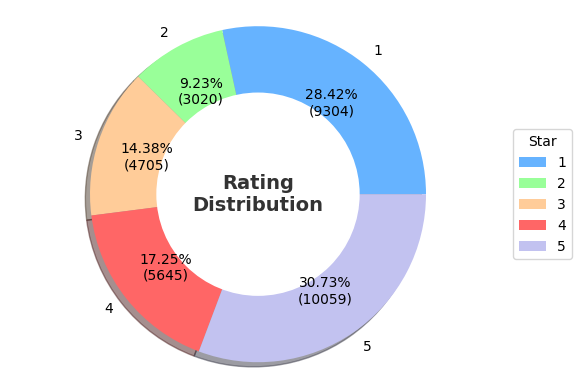

In [49]:
unique_star = df2['Rating'].unique()

explode = [0] * len(unique_star)

sentiment_counts = df2.groupby("Rating").size()

colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff6666', '#c2c2f0']

fig, ax = plt.subplots()

# Plot the pie chart
wedges, texts, autotexts = ax.pie(
    x=sentiment_counts, 
    labels=sentiment_counts.index,  
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})',  
    wedgeprops=dict(width=0.7),  
    textprops=dict(size=10, color="black"),  
    pctdistance=0.7, 
    colors=colors,  
    explode=explode, 
    shadow=True 
)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Rating\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Star", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')

plt.show()

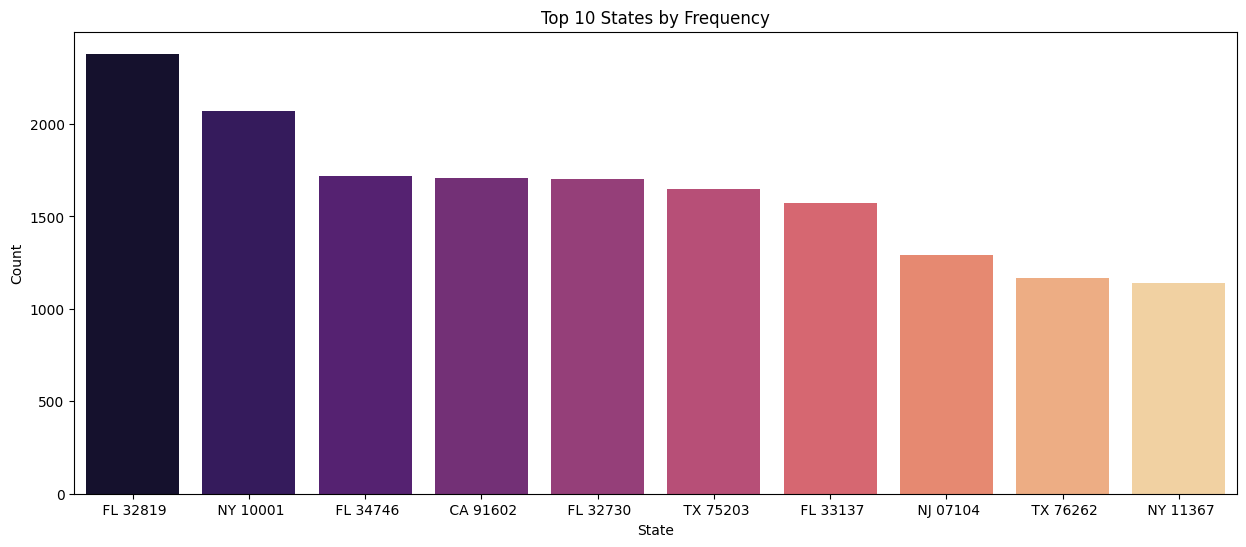

In [50]:
top_10_states=df2["state"].value_counts().nlargest(10)
plt.figure(figsize=(15, 6))
sns.countplot(x="state",data=df2,order=top_10_states.index,palette="magma")
plt.title('Top 10 States by Frequency')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

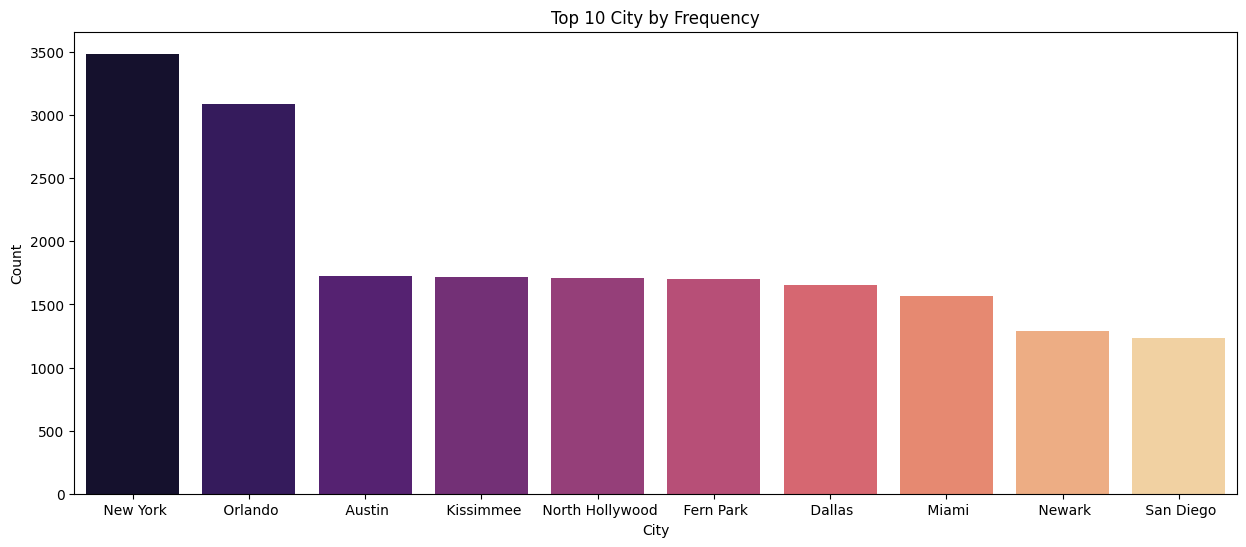

In [51]:
top_10_city = df2['city'].value_counts().nlargest(10)

plt.figure(figsize=(15, 6))
sns.countplot(x='city', data=df2, order=top_10_city.index,palette="magma")
plt.title('Top 10 City by Frequency')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

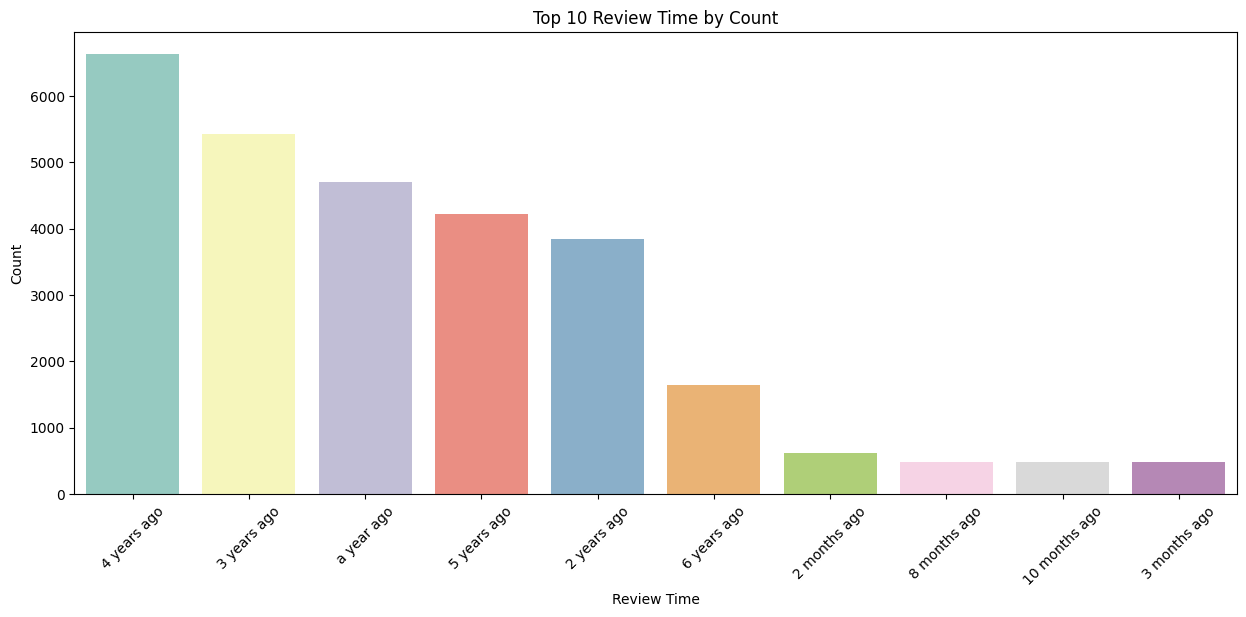

In [52]:
plt.figure(figsize=(15, 6))
sns.countplot(x='review_time', data=df2, order=df2['review_time'].value_counts().iloc[:10].index,palette="Set3")
plt.title('Top 10 Review Time by Count')
plt.xlabel('Review Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [53]:
df2.sample(1)

,review_time,city,state,Rating,CleanedReview
17757,a year ago,Voorhees Township,NJ 08043,5,excellent


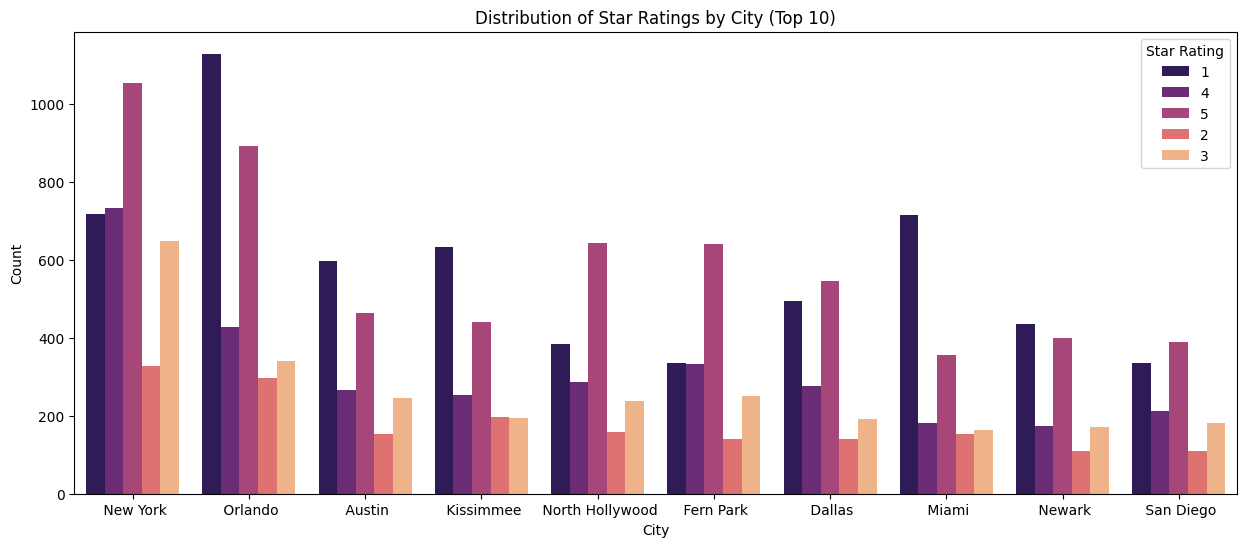

In [54]:
plt.figure(figsize=(15, 6))
sns.countplot(x='city', hue='Rating', data=df2, order=df2['city'].value_counts().iloc[:10].index,palette="magma")
plt.title('Distribution of Star Ratings by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Star Rating')
plt.show()

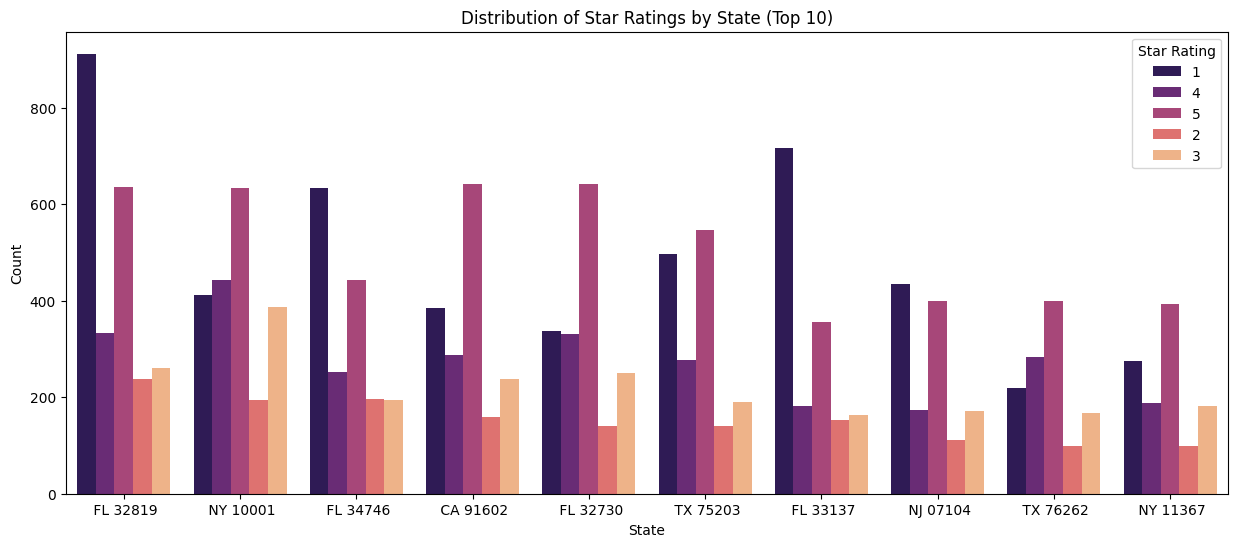

In [55]:
plt.figure(figsize=(15, 6))
sns.countplot(x='state', hue='Rating', data=df2, order=df2['state'].value_counts().iloc[:10].index,palette="magma")
plt.title('Distribution of Star Ratings by State (Top 10)')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Star Rating')
plt.show()

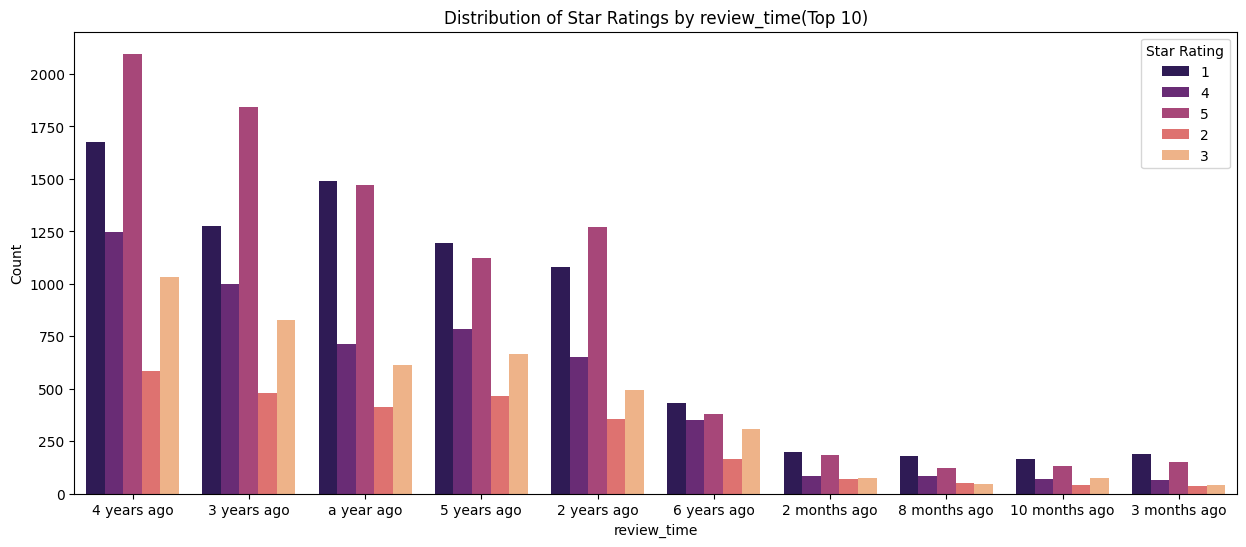

In [56]:
plt.figure(figsize=(15, 6))
sns.countplot(x='review_time', hue='Rating', data=df2, order=df2['review_time'].value_counts().iloc[:10].index,palette="magma")
plt.title('Distribution of Star Ratings by review_time(Top 10)')
plt.xlabel('review_time')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Star Rating')
plt.show()

In [57]:
df2.sample(1)

,review_time,city,state,Rating,CleanedReview
13569,3 years ago,Santa Monica,CA 90405,1,soda refil ask napkin catch


In [58]:
df3 = df2.copy()
df3.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32736 entries, 0 to 33395
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_time    32736 non-null  object
 1   city           32736 non-null  object
 2   state          32736 non-null  object
 3   Rating         32736 non-null  object
 4   CleanedReview  32736 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [59]:
df3 = df3[["Rating","CleanedReview"]]
df3.head(2)


,Rating,CleanedReview
0,1,look like someone spit food normal transaction...
1,4,mcdonalds far food atmosphere go staff make di...


In [60]:
df3["CleanedReview"][0]

'look like someone spit food normal transaction everyone chill polite dont want eat im trying think milky substance food sure coming back'

In [61]:
analyzer=SentimentIntensityAnalyzer()

In [62]:
df3['sentiment_score'] = df3['CleanedReview'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

In [63]:
df3.sample(3)

,Rating,CleanedReview,sentiment_score
9444,3,many homeless hang around always asking someth...,-0.3400
18559,5,fat ok,0.2960
5556,5,excellent,0.5719


In [64]:
df3['sentiment'] = df3['sentiment_score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))


In [65]:
print(df3[['CleanedReview', 'sentiment_score', 'sentiment']].head())


                                       CleanedReview  sentiment_score  \
0  look like someone spit food normal transaction...           0.5541   
1  mcdonalds far food atmosphere go staff make di...           0.8591   
2  made mobile order got speaker checked line mov...          -0.2960   
3  mc crispy chicken sandwich customer service qu...           0.0000   
4  repeat order 3 time drive thru still manage me...          -0.7184   

  sentiment  
0  positive  
1  positive  
2  negative  
3   neutral  
4  negative  


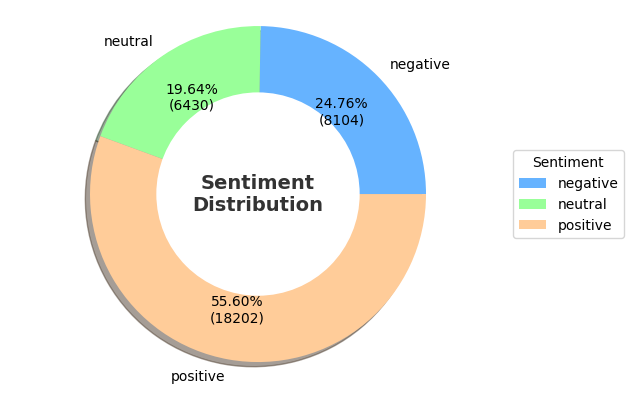

In [66]:
colors = ['#66b3ff', '#99ff99', '#ffcc99']

explode = (0.0, 0, 0)  

sentiment_counts = df3.groupby("sentiment").size()

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts, 
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})', 
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="black"),  
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')  

plt.show()

In [67]:
df3["word_count"] = df3['CleanedReview'].str.len()

In [68]:
df3.sample(3)

,Rating,CleanedReview,sentiment_score,sentiment,word_count
13592,5,came thursday night magic game around pm first...,0.7269,positive,249
12006,1,terrible service terrible management paid 2 gi...,0.2960,positive,264
25146,3,neutral,0.0000,neutral,7


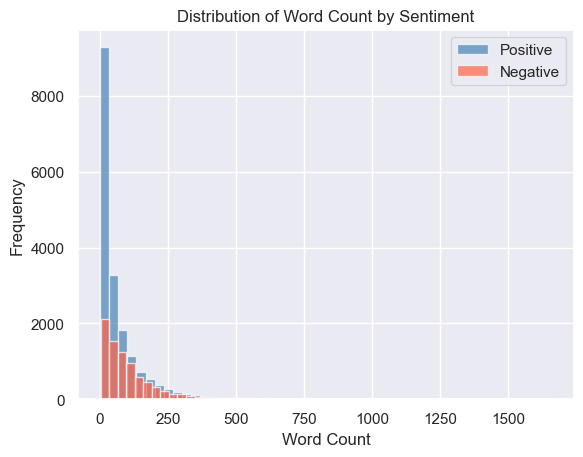

In [69]:
sns.set(style="darkgrid", palette="muted", color_codes=True)

positive_reviews = df3[df3["sentiment"] == 'positive']  
negative_reviews = df3[df3["sentiment"] == 'negative'] 

sns.distplot(positive_reviews['word_count'], color='steelblue', label='Positive', kde=False, hist_kws={'alpha': 0.7})
sns.distplot(negative_reviews['word_count'], color='tomato', label='Negative', kde=False, hist_kws={'alpha': 0.7})

plt.title('Distribution of Word Count by Sentiment')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [70]:
df3['temp_list'] = df3['CleanedReview'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df3['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

top_words_df.style.background_gradient(cmap='Blues')

,Common_words,count
0,food,7710
1,order,7054
2,service,6217
3,good,5482
4,mcdonald,4344
5,place,3455
6,get,3419
7,time,3382
8,drive,2832
9,one,2773


In [71]:
df3['temp_list'] = df3['CleanedReview'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df3['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

fig = px.bar(top_words_df,
            x="count",
            y="Common_words",
            title='Common Words in Text Data',
            orientation='h',
            width=700,
            height=700,
            color='Common_words')

fig.show()

In [72]:
Positive_sent = df3[df3['sentiment'] == 'positive']
Negative_sent = df3[df3['sentiment'] == 'negative']
Neutral_sent = df3[df3['sentiment'] == 'neutral']

In [73]:
Neutral_sent

,Rating,CleanedReview,sentiment_score,sentiment,word_count,temp_list
3,5,mc crispy chicken sandwich customer service qu...,0.0,neutral,51,"[mc, crispy, chicken, sandwich, customer, serv..."
16,4,line w extremely big moving slowly plus apple ...,0.0,neutral,144,"[line, w, extremely, big, moving, slowly, plus..."
24,1,take card,0.0,neutral,9,"[take, card]"
25,1,proud broken ice cream machine planet asked dr...,0.0,neutral,72,"[proud, broken, ice, cream, machine, planet, a..."
27,2,,0.0,neutral,0,[]
...,...,...,...,...,...,...
33359,4,5 star location bathroom 5 star cleaning 4 sta...,0.0,neutral,97,"[5, star, location, bathroom, 5, star, cleanin..."
33361,5,fast service,0.0,neutral,12,"[fast, service]"
33368,2,fry old cold,0.0,neutral,12,"[fry, old, cold]"
33377,5,place always crowded tourist,0.0,neutral,28,"[place, always, crowded, tourist]"


In [74]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Greens')


,Common_words,count
0,good,5139
1,food,4580
2,service,3573
3,order,2946
4,mcdonald,2584
5,excellent,2520
6,great,2199
7,place,2185
8,clean,1830
9,like,1803


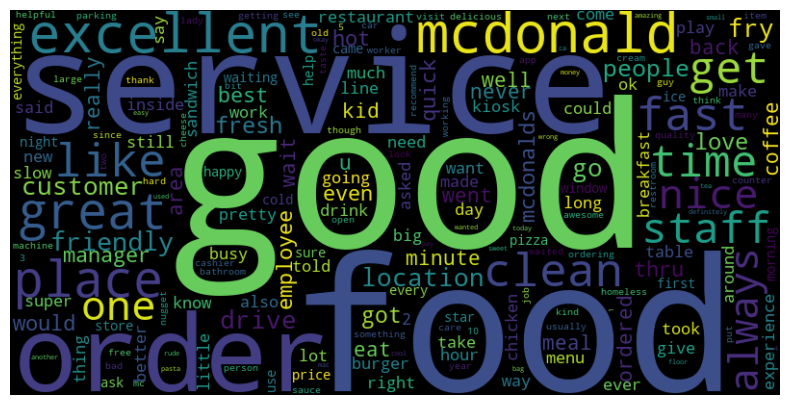

In [75]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(), columns=['Common_words', 'count'])

wordcloud_data = temp_neutral.set_index('Common_words')['count'].to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [76]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'neutral']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Blues')

,Common_words,count
0,neutral,942
1,food,835
2,order,819
3,service,635
4,mcdonald,561
5,fast,540
6,drive,531
7,get,439
8,time,395
9,slow,379


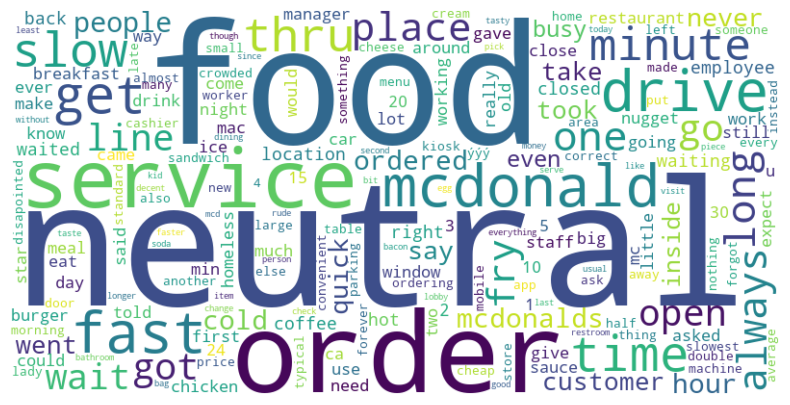

In [77]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'neutral']['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(), columns=['Common_words', 'count'])

wordcloud_data = temp_neutral.set_index('Common_words')['count'].to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [78]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'negative']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Reds')

,Common_words,count
0,order,3289
1,food,2295
2,service,2009
3,get,1339
4,time,1332
5,mcdonald,1199
6,drive,1097
7,worst,1077
8,bad,1073
9,customer,1064


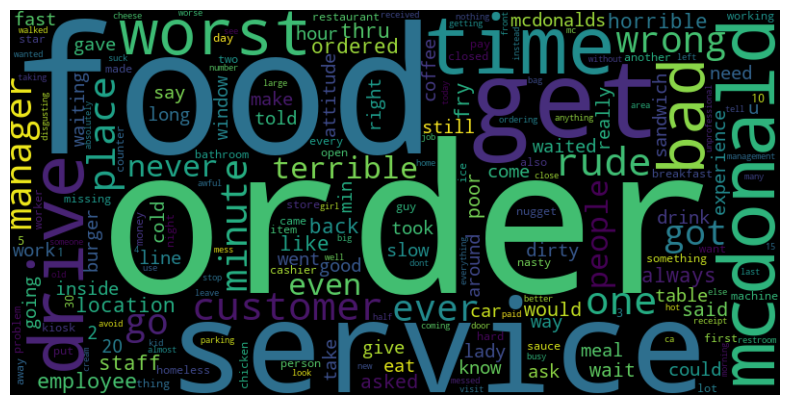

In [79]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'negative']['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(), columns=['Common_words', 'count'])

wordcloud_data = temp_negative.set_index('Common_words')['count'].to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [80]:
df4 = df3.copy()


In [81]:
df4.sample(2)

,Rating,CleanedReview,sentiment_score,sentiment,word_count,temp_list
20783,5,excellent,0.5719,positive,9,[excellent]
4753,1,restaurant available toilet,0.0000,neutral,27,"[restaurant, available, toilet]"


In [82]:
X = df4['CleanedReview']
y = df4['sentiment']

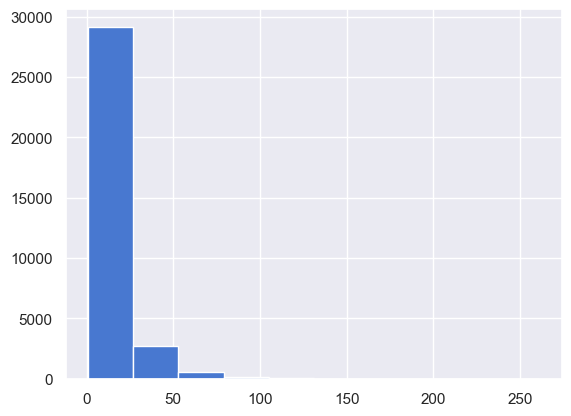

In [83]:
text_lengths = X.apply(lambda x: len(x.split(" ")))
plt.hist(text_lengths)
plt.show()

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [85]:
nb_pipeline = make_pipeline(TfidfVectorizer(), MultinomialNB())
svc_pipeline = make_pipeline(TfidfVectorizer(), SVC())
bernoulli_nb_pipeline = make_pipeline(TfidfVectorizer(), BernoulliNB())
logistic_pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression())
pa_pipeline = make_pipeline(TfidfVectorizer(), PassiveAggressiveClassifier())
ra_pipeline = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
etc_pipeline = make_pipeline(TfidfVectorizer(), ExtraTreesClassifier())
bg_pipeline = make_pipeline(TfidfVectorizer(), BaggingClassifier())
adb_pipeline = make_pipeline(TfidfVectorizer(), AdaBoostClassifier())
gbc_pipeline = make_pipeline(TfidfVectorizer(), GradientBoostingClassifier())
knc_pipeline = make_pipeline(TfidfVectorizer(), KNeighborsClassifier())
dtc_pipeline = make_pipeline(TfidfVectorizer(), DecisionTreeClassifier())

In [86]:
pipelines=[
    nb_pipeline,
    svc_pipeline,
    bernoulli_nb_pipeline,
    logistic_pipeline,
    pa_pipeline,
    ra_pipeline,
    bg_pipeline,
    etc_pipeline,
    adb_pipeline,
    gbc_pipeline,
    knc_pipeline,
    dtc_pipeline
]

In [93]:
knc_pipeline.steps[1][0]

'kneighborsclassifier'

In [94]:
all_models=[]
def models_implement(model):
    print("Model_Pipeline {}".format(model))
    model.fit(X_train,y_train)
    model_predictions = model.predict(X_test)
    print(classification_report(y_test, model_predictions))
    print(precision_score(y_test, model_predictions,average="macro"))
    print(accuracy_score(y_test, model_predictions))
    model_dict={
        "name":model.steps[1][0],
        "accuracy":accuracy_score(y_test, model_predictions),
        "precision":precision_score(y_test, model_predictions,average="macro")
    }
    all_models.append(model_dict)
    

    

In [95]:
for model in pipelines:
    models_implement(model)
    
    print("======================================")


Model_Pipeline Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])
              precision    recall  f1-score   support

    negative       0.85      0.77      0.80      1668
     neutral       0.97      0.24      0.39      1229
    positive       0.75      0.97      0.84      3651

    accuracy                           0.78      6548
   macro avg       0.86      0.66      0.68      6548
weighted avg       0.81      0.78      0.75      6548

0.8554635288862604
0.779627367135003
Model_Pipeline Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])
              precision    recall  f1-score   support

    negative       0.92      0.90      0.91      1668
     neutral       0.90      0.92      0.91      1229
    positive       0.96      0.96      0.96      3651

    accuracy                           0.94      6548
   macro avg       0.93      0.93      0.93      6548
weighted avg       0.94      0.94      0.94 

In [97]:
all_models_df=pd.DataFrame(all_models)

In [99]:
all_models_df.sort_values(by=["precision","accuracy"],ascending=False,inplace=True,ignore_index=True)

In [100]:
all_models_df

,name,accuracy,precision
0,passiveaggressiveclassifier,0.941967,0.929072
1,svc,0.938913,0.926298
2,extratreesclassifier,0.924710,0.918669
3,randomforestclassifier,0.923794,0.913096
4,logisticregression,0.927917,0.912955
5,baggingclassifier,0.925321,0.908436
6,decisiontreeclassifier,0.911881,0.895757
7,multinomialnb,0.779627,0.855464
8,gradientboostingclassifier,0.800092,0.846773
9,adaboostclassifier,0.826665,0.809026


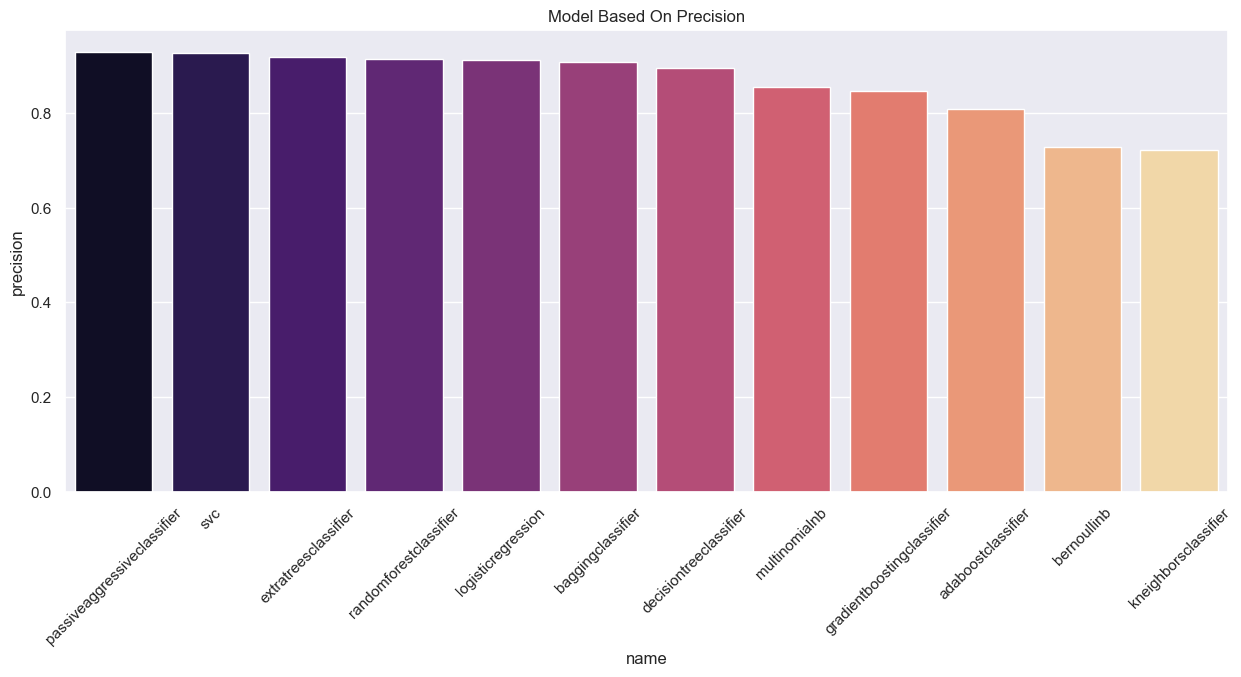

In [153]:
plt.figure(figsize=(15, 6))
sns.barplot(x='name', data=all_models_df, y=all_models_df["precision"],palette="magma")
plt.title('Model Based On Precision')

plt.xticks(rotation=45)
plt.show()

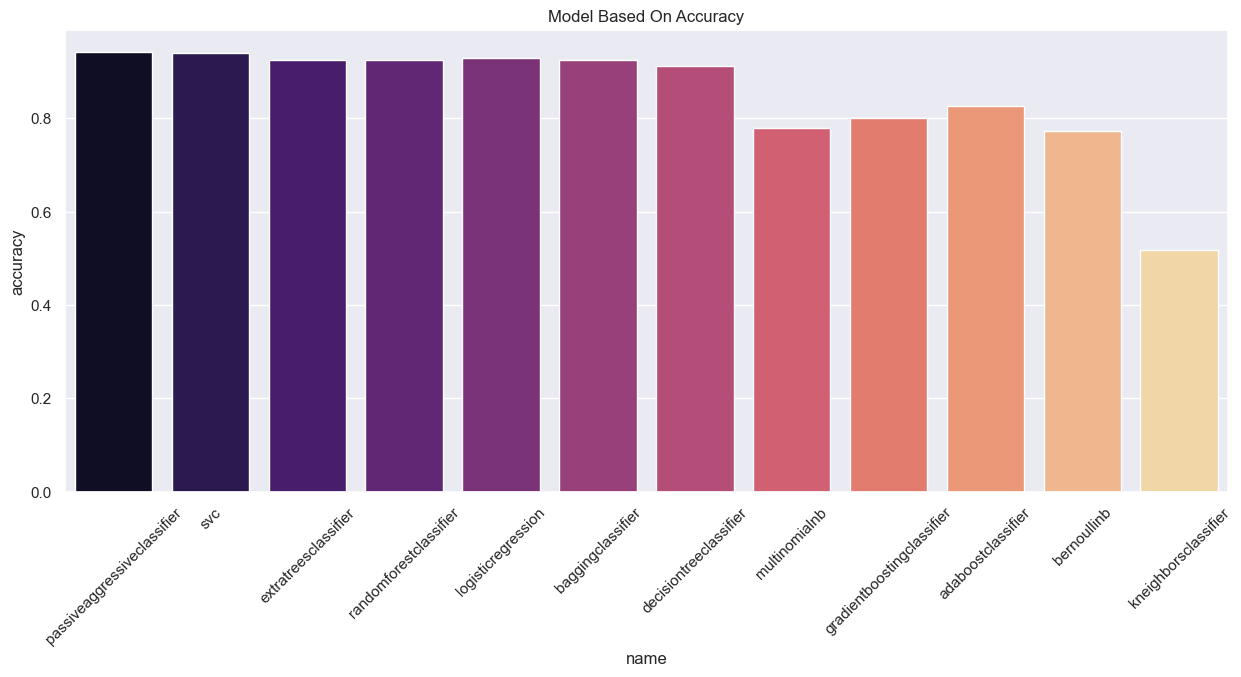

In [154]:
plt.figure(figsize=(15, 6))
sns.barplot(x='name', data=all_models_df, y=all_models_df["accuracy"],palette="magma")
plt.title('Model Based On Accuracy')
plt.xticks(rotation=45)
plt.show()

# **PAC Is The Best Model**

In [131]:
tfidf=TfidfVectorizer()
X_train_vectorize=tfidf.fit_transform(X_train)

In [132]:
X_test_vectorize=tfidf.transform(X_test)

In [133]:
pac=PassiveAggressiveClassifier()
pac.fit(X_train_vectorize,y_train)

PassiveAggressiveClassifier()

In [134]:
pac_preds=pac.predict(X_test_vectorize)

In [135]:
conf_mat = confusion_matrix(y_test, pac_preds)


In [139]:
precision_score = precision_score(y_test, pac_preds,average="micro")
precision_score

0.9437996334758705

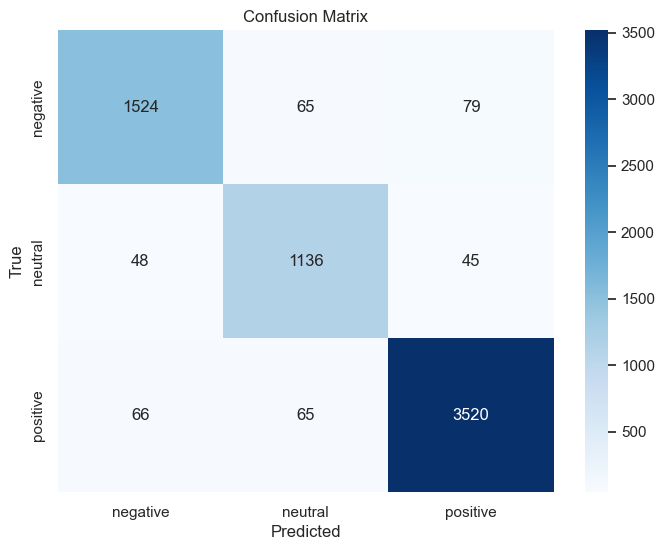

In [137]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [143]:
from sklearn.metrics import precision_score
precision_score

<function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [147]:
pac_pipeline = make_pipeline(TfidfVectorizer(), PassiveAggressiveClassifier())
cv_scores = cross_val_score(pac_pipeline, X, y, cv=5, scoring="accuracy")

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

Cross-validation scores: [0.92226634 0.89919047 0.94486024 0.97159004 0.9787689 ]
Mean CV score: 0.9433351988287499
Standard deviation of CV scores: 0.029829056754931662


In [169]:
X.values

array(['look like someone spit food normal transaction everyone chill polite dont want eat im trying think milky substance food sure coming back',
       'mcdonalds far food atmosphere go staff make difference friendly accommodating always smiling make pleasant experience many fast food place',
       'made mobile order got speaker checked line moving leave otherwise late work never got refund app called said could get money back person stuck system went person next day manager told',
       ..., 'remove hunger enough', 'good lately become expensive',
       'took good care'], dtype=object)

In [186]:
tfidf=TfidfVectorizer()
X_transformed=tfidf.fit_transform(X.values)

In [190]:
pac=PassiveAggressiveClassifier()

In [191]:
pac.fit(X_transformed,y)

PassiveAggressiveClassifier()

In [199]:
import pickle

with open("./pklFiles/tfidfVectorize.pkl","wb") as file:
    pickle.dump(tfidf,file)



with open("./pklFiles/pac.pkl","wb") as file:
    pickle.dump(pac,file)
    